Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]


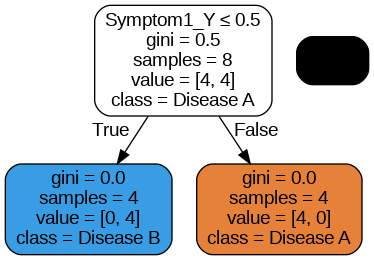

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Sample dataset (replace with your dataset)
data = {
    'Symptom1': ['Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N'],
    'Symptom2': ['Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N'],
    'Symptom3': ['N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y'],
    'Disease': ['Disease A', 'Disease B', 'Disease B', 'Disease A', 'Disease A',
                'Disease B', 'Disease B', 'Disease A', 'Disease A', 'Disease B']
}

# Creating DataFrame
df = pd.DataFrame(data)

# Converting categorical variables into numerical
df = pd.get_dummies(df, columns=['Symptom1', 'Symptom2', 'Symptom3'])

# Splitting dataset into features and target variable
X = df.drop('Disease', axis=1)
y = df['Disease']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Decision Tree classifier
clf = DecisionTreeClassifier()

# Training Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualizing Decision Tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=y.unique(),
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
